In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, set_matplotlib_formats
import myst_nb

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+svg'
pio.templates['book'] = go.layout.Template(
    layout=dict(
        margin=dict(l=10, r=10, t=10, b=10),
        autosize=True,
        width=350, height=250,
    )
)
pio.templates.default = 'seaborn+book'

set_matplotlib_formats('svg')
sns.set()
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [2]:
_clear = ['bingroup']

def _clear_props(traces):
    for trace in traces:
        for prop in _clear:
            if hasattr(trace, prop):
                trace.update({prop: None})

def left_right(left, right, width=700, height=250, **kwargs):
    fig = make_subplots(cols=2, **kwargs)
    fig.update_layout(width=width, height=height)
    
    t1 = list(left.select_traces())
    t2 = list(right.select_traces())
    _clear_props([*t1, *t2])
    fig.add_traces(t1, rows=1, cols=1)
    fig.add_traces(t2, rows=1, cols=2)
    return fig

def margin(fig, **kwargs):
    return fig.update_layout(margin=kwargs)

def to_plotly_text(text):
    return text.strip().replace('\n', '<br>')

(ch:viz_plotly)=
# Creating Plots Using `plotly`

In this section, we'll cover the basics of the `plotly` Python package.
`plotly` is the main tool we use in this book to create plots.

It has several advantages over other plotting libraries.
First, it creates interactive plots rather than static images.
When you create a plot in `plotly`, you can pan and zoom to see parts of the
plot that are too small to see normally.
You can also hover over plot elements, like the marks in a scatter plot, to
see the raw data values.
Second, it can save plots using the SVG file format, which means that
images appear sharp even when zoomed in. If you're reading this chapter
in a PDF or paper copy of the book, we used this feature to render plot images.
Finally, it has a simple API for creating basic plots, which helps when
you're doing exploratory analysis and want to quickly create many plots.

We'll go over the fundamentals of `plotly` in this section.
We recommend using the official `plotly` documentation if you encounter
something that isn't covered here [^plotly]. 

[^plotly]: https://plotly.com/python/

## `Figure` and `Trace` Objects

Every plot in `plotly` is wrapped in a `Figure` object.
`Figure` objects keep track of what plots to draw.
For instance, a single `Figure` can draw a scatter plot on the left and 
a line plot on the right.
`Figure` objects also keep track of the plot layout, which includes the
size of the plot, title, legend, and annotations.

Let's look at an example using the dataset of dog breeds.

In [20]:
dogs = pd.read_csv('data/akc.csv').dropna()
dogs

,breed,group,score,longevity,...,size,weight,height,repetition
2,Brittany,sporting,3.54,12.92,...,medium,16.0,48.0,5-15
3,Cairn Terrier,terrier,3.53,13.84,...,small,6.0,25.0,15-25
5,English Cocker Spaniel,sporting,3.33,11.66,...,medium,14.0,41.0,5-15
...,...,...,...,...,...,...,...,...,...
82,Bullmastiff,working,1.64,7.57,...,large,52.0,65.0,40-80
83,Mastiff,working,1.57,6.50,...,large,79.0,76.0,80-100
85,Saint Bernard,working,1.42,7.78,...,large,70.0,67.0,40-80


In [34]:
# plotly.express provides a concise API for making plots
import plotly.express as px

# Create a scatter plot
fig = px.scatter(dogs, x='height', y='weight', 
                 width=350, height=250)

# fig is a plotly Figure object:
fig.__class__

plotly.graph_objs._figure.Figure

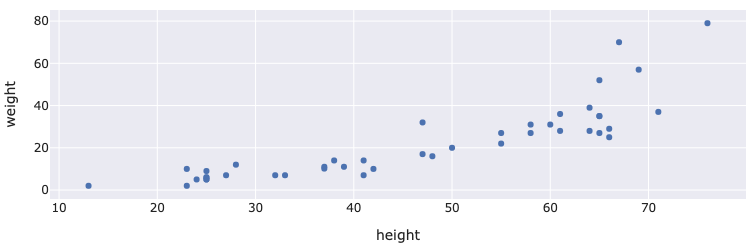

In [35]:
# Displaying a Figure object renders it to the screen
fig

This `Figure` holds one plot. 
But `Figure` objects can hold any number of plots:

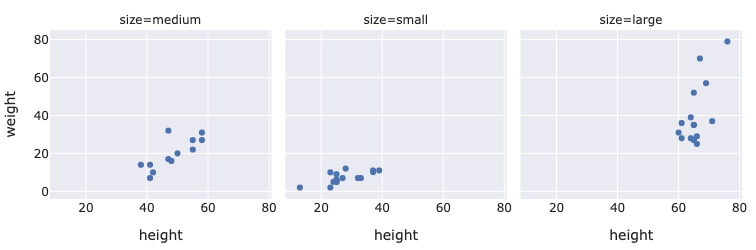

In [42]:
fig = px.scatter(dogs, x='height', y='weight',
                 facet_col='size',
                 width=650, height=250)
fig.update_layout(margin=dict(t=30))
fig

This figure holds three scatter plots.
These individual plots are stored in `Trace` objects.
However, we don't usually manipulate `Trace` objects manually.
Instead, `plotly` provides functions that automatically create
facetted subplots, like the `px.scatter` function we used here.

## Modifying Layout

We often need to change the figure's layout.
For instance, we might want to adjust the figure margins, or
change the axis range.
To do this, we can use the `Figure.update_layout()` method.
Let's look at an example:

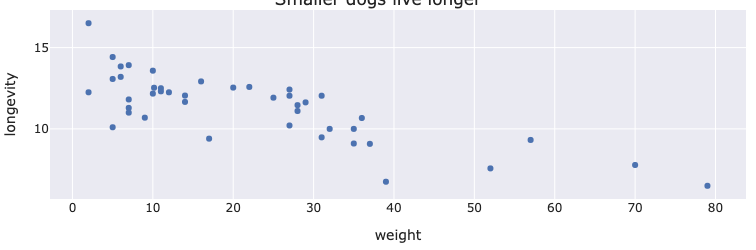

In [47]:
# Adds a title, but title is cut off because the plot doesn't have enough
# margin
fig = px.scatter(dogs, x='weight', y='longevity',
                 title='Smaller dogs live longer',
                 width=350, height=250)
fig

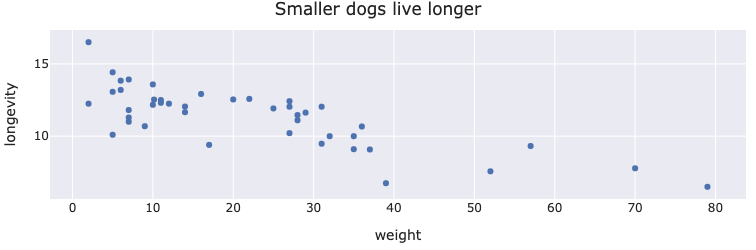

In [48]:
# So, we can adjust the margin 
fig = px.scatter(dogs, x='weight', y='longevity',
                 title='Smaller dogs live longer',
                 width=350, height=250)

fig.update_layout(margin=dict(t=30))
fig

The `.update_layout()` lets us modify any property of a layout.
This includes the plot title (`title`), margins (`margins` dictionary), 
and whether to display a legend (`showlegend`).
The `plotly` documentation has the full list of layout properties [^layout].

`Figure` objects also have `.update_xaxes()` and `.update_yaxes()` functions,
which are similar to `.update_layout()`. These two functions let us modify
properties of the axes, like the axis limits (`range`), number of ticks
(`nticks`), and axis label (`title`).

[^layout]: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html

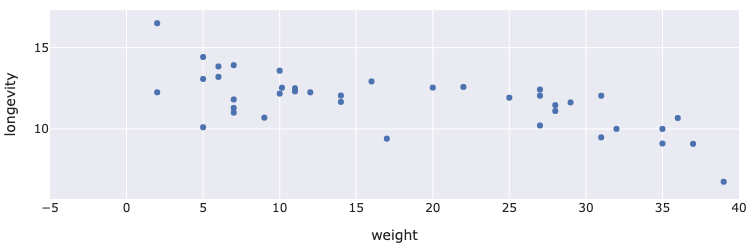

In [52]:
fig = px.scatter(dogs, x='weight', y='longevity',
                 width=350, height=250)

# Adjust x-axis range
fig.update_xaxes(range=[-5, 40])
fig

## Plotting Functions

`plotly` comes with many types of plots, including line plots, scatter plots,
bar plots, box plots, and histograms. 
The API is similar for each type of plot.
The dataframe is the first argument.
Then, we can specify a column of the dataframe to place on the x-axis
and a column to place on the y-axis using the `x` and `y` keyword arguments.


In [55]:
run = pd.read_csv('data/cherryBlossomMen.csv')
medians = run.groupby('year')[['time']].median().reset_index()
medians

,year,time
0,1999,5057.0
1,2000,5102.5
2,2001,5218.0
...,...,...
11,2010,5813.0
12,2011,5757.0
13,2012,5248.0


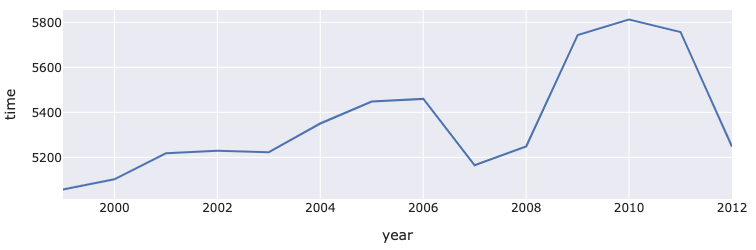

In [59]:
# x and y are names of columns in the input dataframe
px.line(medians, x='year', y='time',
        width=350, height=250)

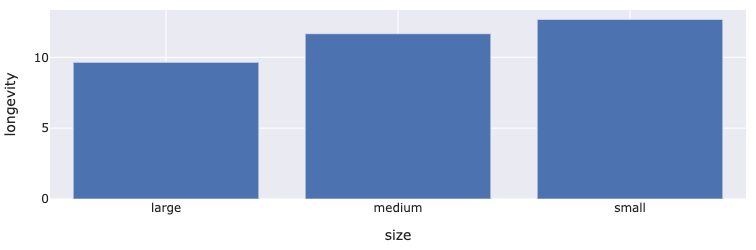

In [65]:
lifespans = dogs.groupby('size')['longevity'].mean().reset_index()

# x and y work the same for other plotting methods, like px.bar
px.bar(lifespans, x='size', y='longevity',
       width=350, height=250)

Plotting methods in `plotly` also contain arguments for making facet plots.
We can facet using color on the same plot (`color` argument), or
facet into multiple subplots (`facet_col` and `facet_row`).

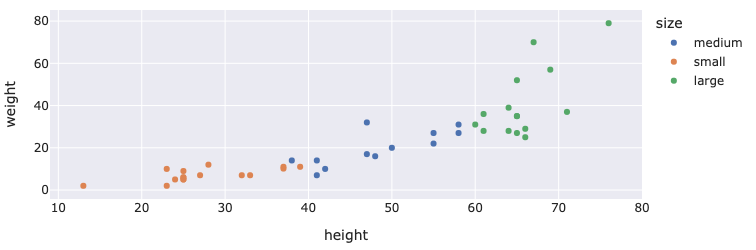

In [78]:
# color also takes in a column of the dataframe
fig = px.scatter(dogs, x='height', y='weight', color='size',
                 width=350, height=250)
fig

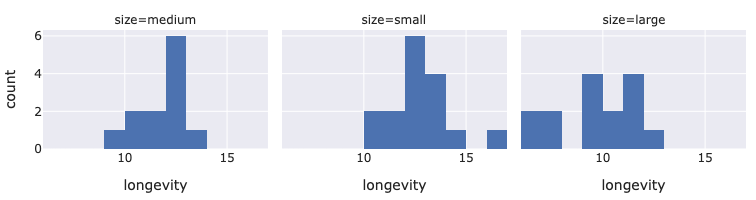

In [80]:
# facet_col also takes in a column of the dataframe
fig = px.histogram(dogs, x='longevity', facet_col='size',
                   width=600, height=200)
fig.update_layout(margin=dict(t=30))

For the complete list of plotting functions, see the main documentation for
`plotly` [^plotly] or `plotly.express` [^px], the submodule of `plotly` that we 
use in the book.

[^px]: https://plotly.com/python-api-reference/plotly.express.html

## Annotations

To add annotations to a `Figure`, we use the `Figure.add_annotation()` method.
Annotations have text and an arrow. The location of the arrow
is set using the `x` and `y` parameters, and we can shift the
location of the text from its default position
using the `ax` and `ay` parameters.

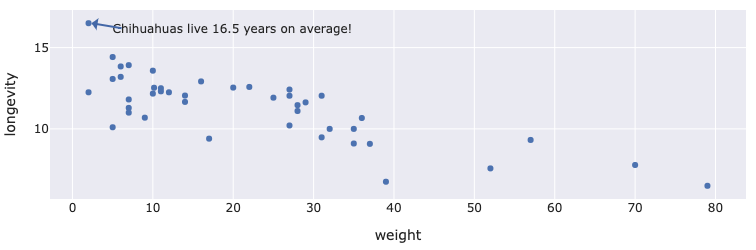

In [95]:
fig = px.scatter(dogs, x='weight', y='longevity',
                 width=350, height=250)

fig.add_annotation(text='Chihuahuas live 16.5 years on average!'
                   x=2, y=16.5,
                   ax=30, ay=5,
                   xshift=3,
                   xanchor='left')
                   

# Adjust x-axis range
fig

## Takeaways

This section covered the basics of creating plots using the `plotly` Python
package. We introduced the `Figure` object, which is the object `plotly`
uses to store plots and their layouts.
We covered the basic plot types that `plotly` makes available, and
a few ways to customize plots by adjusting the layout and axes, and by
adding annotations. 
In the next section, we'll compare `plotly` to other common tools for creating
visualizations in Python.